In [1]:
import numpy as np 
from scipy.integrate import odeint
import os, sys, warnings
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import utility as ut
import surrogate1 as sr1
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression as LReg
from joblib import Parallel, delayed
warnings.filterwarnings('ignore')

**Write FTLEs**

In [73]:
all_D_r = [2**n for n in range(2, 13)]
save_folder = '../data/L63-Strategy-varying-features/'
for D_r in all_D_r:
    print('Working on D_r = {}'.format(D_r))
    bsa = sr1.BatchStrategyAnalyzer_SMLR(save_folder+str(D_r))
    bsa.write_ftle(save_folder + '{}/ftle.npy'.format(32))
    # arr = np.load(bsa.save_folder + '/ftle.npy')
    # print(arr)

Working on D_r = 4
Working on D_r = 8
Working on D_r = 16
Working on D_r = 32
Working on D_r = 64
Working on D_r = 128
Working on D_r = 256
Working on D_r = 512
Working on D_r = 1024
Working on D_r = 2048
Working on D_r = 4096


**$\tau_f$ vs FTLE$^{-1}$**

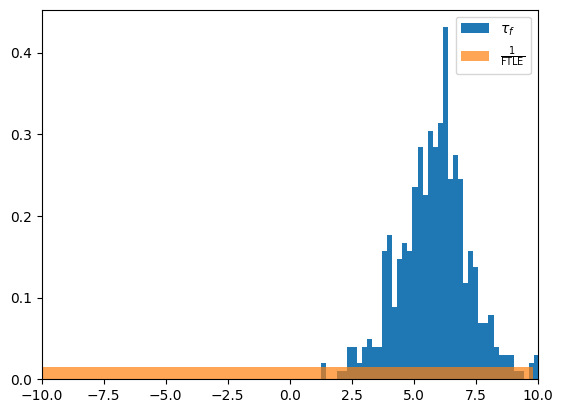

In [77]:
D_r = 4096
bsa = sr1.BatchStrategyAnalyzer_SMLR(save_folder+str(D_r))
data = bsa.get_data()
sub_data = data[data['good_rows_W_in']==1.0]
tau_f = sub_data['tau_f_se']
ftle = sub_data['ftle']
ftle1 = 1/ftle
# tau_f = (tau_f-tau_f.mean())
# ftle1 = (ftle1-ftle1.mean())
# tau_f = tau_f[ftle1<0.]
# ftle1 = ftle1[ftle1<0.]
plt.hist(tau_f, density=True, label=r'$\tau_f$', bins=50)
plt.hist(ftle1, density=True, alpha=0.7, label=r'$\frac{1}{\rm FTLE}$', bins=50)
plt.xlim(-10, 10)
# plt.hist(ftle, density=True, alpha=0.7, label=r'FTLE')
plt.legend()

Text(0, 0.5, '$\\tau_f$')

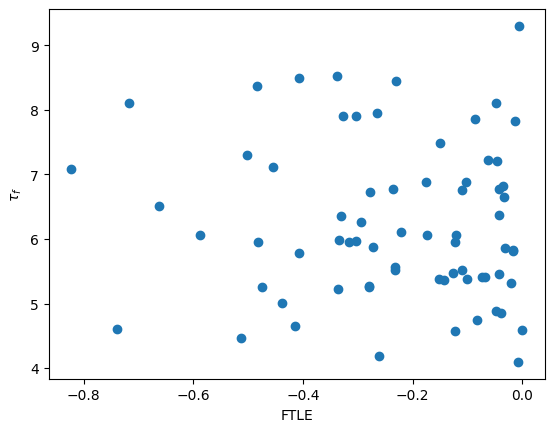

In [75]:
plt.scatter(1/ftle1, tau_f)
plt.xlabel('FTLE')
plt.ylabel(r'$\tau_f$')

Text(0, 0.5, '$Corr(\\tau_f, {\\rm FTLE})$')

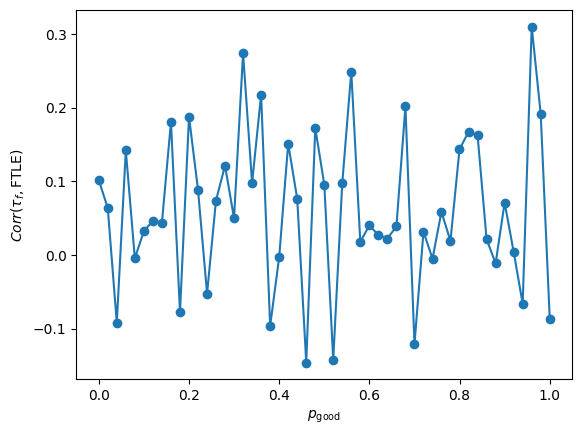

In [70]:
corr = []
for i in bsa.percents:
    d = data[data['good_rows_W_in']==i]
    f = d['ftle']
    t = d['tau_f_se']
    t = t[f<0]
    f = f[f<0]
    corr.append(stats.pearsonr(t, f).statistic)
plt.plot(bsa.percents, corr)
plt.scatter(bsa.percents, corr)
plt.xlabel(r'$p_{\rm good}$')
plt.ylabel(r'$Corr(\tau_f, {\rm FTLE})$')

In [22]:
len(np.unique(sub_data['test_index'].to_numpy()))

480

(array([  2.,  18.,  57.,  90., 203.,  73.,  33.,  17.,   3.,   4.]),
 array([0.04805776, 0.230424  , 0.41279025, 0.59515649, 0.77752274,
        0.95988898, 1.14225523, 1.32462147, 1.50698772, 1.68935397,
        1.87172021]),
 <BarContainer object of 10 artists>)

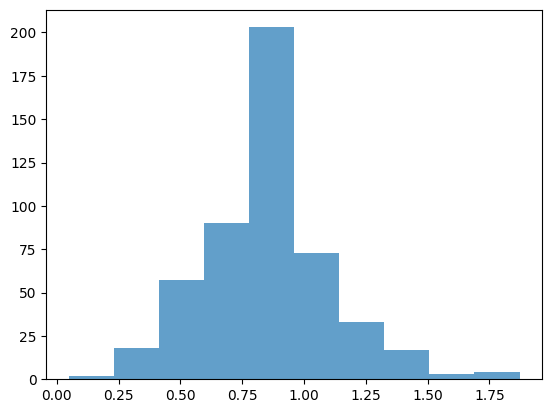

In [7]:
plt.hist(ftle,  alpha=0.7, bins=10)

(array([0.0078353 , 0.03721768, 0.0999001 , 0.19784137, 0.31145325,
        0.2076355 , 0.07835302, 0.02154708, 0.00979413, 0.0078353 ]),
 array([ 1.274  ,  2.29502,  3.31604,  4.33706,  5.35808,  6.3791 ,
         7.40012,  8.42114,  9.44216, 10.46318, 11.4842 ]),
 <BarContainer object of 10 artists>)

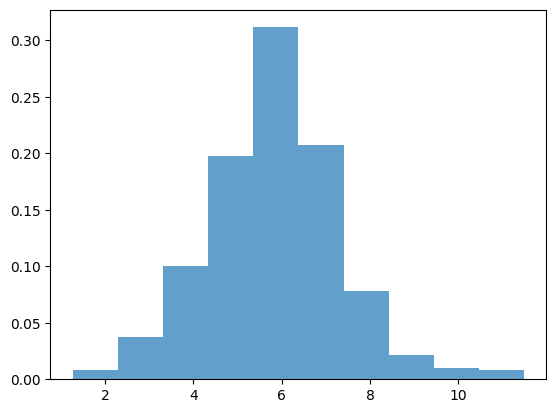

In [8]:
plt.hist(tau_f, density=True, alpha=0.7)

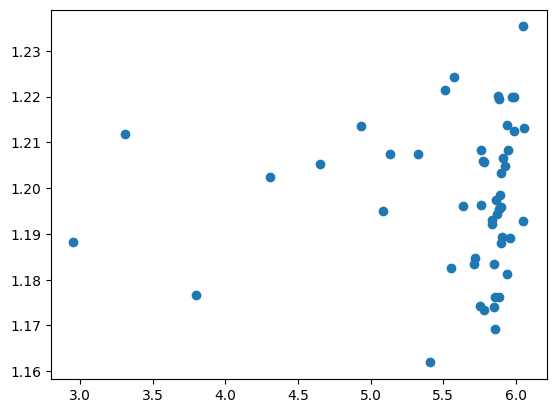

In [9]:
plt.scatter(bsa.get_line('tau_f_se')[0], 1./bsa.get_line('ftle')[0])

In [10]:
x1 = data['good_rows_W_in']
x2 = data['ftle']
X = np.vstack([x1, x2]).T
y = data['tau_f_se']
res = LReg().fit(X, y)

In [11]:
res.score(X, y)

0.10999184196599288

In [12]:
res.coef_

array([ 1.54695099, -1.22852562])

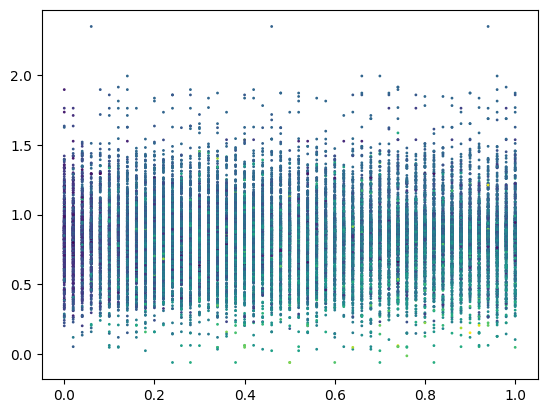

In [31]:
plt.scatter(x1, x2, c=y, s=1)

PearsonRResult(statistic=-0.2601867519056078, pvalue=1.5306796425843947e-77)

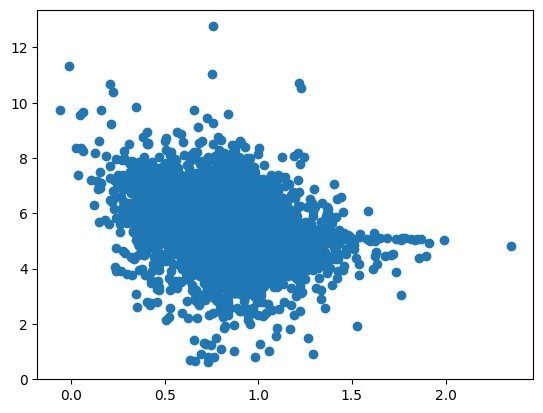

In [46]:
unique_test_idx = np.unique(data['test_index'].to_numpy())
m = len(unique_test_idx)
f, t = [0]*m, [0]*m
for i, test_idx in enumerate(unique_test_idx):
    d = data[data['test_index']==test_idx]
    f[i] = d['ftle'].mean()
    t[i] = d['tau_f_se'].mean()
t = [x for _, x in sorted(zip(f, t))]
f.sort()
plt.scatter(f, t)
stats.pearsonr(f, t)

In [35]:
m

4959

In [41]:
f

[1.059629307901757,
 0.8729672787010111,
 0.8396292928771928,
 0.6234990678797638,
 1.077213099264754,
 0.7885618834995484,
 0.8442782778822208,
 0.5557985488662075,
 0.8854637012857355,
 0.602666082502436,
 0.8217774537692009,
 0.9632261248854393,
 0.5305253221055126,
 1.025338667303608,
 0.9315061472403132,
 0.6473266911697538,
 1.3669714441841936,
 0.9124852763398856,
 0.9095359982211385,
 0.9181348532246882,
 0.816660698464465,
 0.9724089570223386,
 1.0601592935624289,
 1.0548703872071326,
 0.9206957394498408,
 0.6828009982093051,
 0.2616854040375056,
 0.7276697295176512,
 0.7825127657826236,
 1.1994556299563703,
 0.7699710113811689,
 0.8601387637143784,
 1.3545469080437045,
 0.7907197121574199,
 1.0209119447490262,
 0.9195881914394607,
 0.812420535585944,
 1.0327006497499829,
 0.5733239994450207,
 0.5753066679991075,
 0.6480550066930671,
 0.922832576153174,
 0.8794608531637079,
 0.7804052079045526,
 0.835222400786207,
 0.6671374741450294,
 0.7585647340381456,
 0.9243253279053733,


In [42]:
f.sort()

In [43]:
f

[-0.0603507964127807,
 -0.0128178092628981,
 0.0240035443060458,
 0.0344167419114109,
 0.0480577550373005,
 0.0529226830328004,
 0.0605281371277846,
 0.0626134327100346,
 0.1038363036323328,
 0.11978985775179089,
 0.12708933106395112,
 0.1355751625082115,
 0.1431146889378156,
 0.1441603763127466,
 0.1478073973082568,
 0.1498271807118591,
 0.1526772360269502,
 0.1561907805219963,
 0.1584408227940185,
 0.15995378303802613,
 0.1824818039714135,
 0.1870929390014402,
 0.2024062805338199,
 0.2047696672225351,
 0.2055544077493261,
 0.20852410418131567,
 0.2090037316962348,
 0.21333536270662803,
 0.21827405640730674,
 0.22385262082772436,
 0.2241056164938593,
 0.228564579639314,
 0.2289107554260404,
 0.22960978768167423,
 0.23201143540488947,
 0.2370667594592087,
 0.24111320363377878,
 0.2413599417315567,
 0.2419659883169573,
 0.2446513654522852,
 0.24837582787157314,
 0.2510073484802843,
 0.2616854040375056,
 0.2625458540288976,
 0.2631011012217437,
 0.2671421057489887,
 0.26869255459909075,


In [44]:
t

[9.752925,
 11.3386,
 8.35835,
 7.400119999999999,
 9.543625,
 8.35198,
 9.649640000000002,
 8.2446,
 7.1981,
 6.282033333333334,
 8.165733333333334,
 7.18445,
 7.1480500000000005,
 6.885666666666666,
 5.6893199999999995,
 8.62316,
 7.504466666666667,
 6.91145,
 9.7188,
 7.0961799999999995,
 5.751200000000001,
 8.08535,
 5.61652,
 7.261800000000001,
 10.6678,
 7.71316,
 6.4974,
 9.245600000000001,
 6.4246,
 6.82136,
 10.38856,
 7.18536,
 6.538350000000001,
 6.1646,
 4.0677,
 3.913,
 5.830066666666667,
 7.947333333333333,
 4.744133333333333,
 6.934200000000001,
 7.389200000000001,
 7.3528,
 7.234500000000001,
 5.6165199999999995,
 5.309850000000001,
 3.8948,
 6.6274,
 5.75302,
 6.188,
 6.0684,
 7.929133333333333,
 6.9524,
 4.6228,
 5.7967,
 6.450080000000002,
 5.7057,
 7.380099999999999,
 7.020650000000001,
 8.0171,
 6.894160000000001,
 6.279,
 8.238533333333335,
 5.866466666666668,
 6.9706,
 4.562133333333334,
 7.917000000000002,
 5.7824,
 7.2228,
 6.254733333333334,
 5.657166666666668

In [54]:
ftle.mean()

0.8517093537080682